<a href="https://colab.research.google.com/github/ucfilho/ANN_capstone_projects/blob/master/ANN_MGabi_dez_05_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://github.com/marquesgabi/Trabalho1

#bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d

In [2]:
# local dos dados
!git clone https://github.com/marquesgabi/Trabalho1/
%cd Trabalho1
!ls

Cloning into 'Trabalho1'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 35 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), done.
/content/Trabalho1
 ANNTrabalho1.ipynb		      Dados_Experimentais_4.csv
'Dados_Experimentais_2 - Cópia.csv'  'Matéria ANN Trabalho 1.pdf'


In [0]:
# sigmoid function                                           # usa a sigmoide no neuronio oculto
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# purelin function                                           #a gaussiana é muito utilizada para classificação. aplica a purelin na saida
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [4]:
# leitura dos dados                                               
DAT=pd.read_csv("Dados_Experimentais_2 - Cópia.csv")
print(DAT.head())

   Temperature   Rela_Viscosity  FracaoV
0     24.946458        1.077714     0.05
1     34.969159        1.060571     0.05
2     44.991859        1.043429     0.05
3     55.016438        1.033143     0.05
4     64.960235        1.028000     0.05


In [5]:
# separa as colunas de interesse
Index=[0,1,2]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

   Temperature   Rela_Viscosity  FracaoV
0     24.946458        1.077714     0.05
1     34.969159        1.060571     0.05
2     44.991859        1.043429     0.05
3     55.016438        1.033143     0.05
4     64.960235        1.028000     0.05


In [6]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
print(Dat_Select.head())

   Temperature   Rela_Viscosity  FracaoV
0     -1.000000       -0.777778     -1.0
1     -0.501297       -0.854406     -1.0
2     -0.002594       -0.931034     -1.0
3      0.496202       -0.977011     -1.0
4      0.990979       -1.000000     -1.0


In [7]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None)
test=DAT.drop(train.index)
print(train.head())
Col_Indep=['Temperature ', 'Rela_Viscosity',  'FracaoV']
print(test.head())
print("=======================")
print(test.shape[0])
print(test.shape[1])
print(train.shape[0])
print(train.shape[1])
print("=======================")

    Temperature   Rela_Viscosity   FracaoV
28      0.501461        0.747126  1.000000
7       0.995630       -0.816092 -0.894737
25     -0.990489        1.000000  1.000000
11     -0.499965       -0.417625 -0.684211
10     -0.994625       -0.356322 -0.684211
    Temperature   Rela_Viscosity   FracaoV
2      -0.002594       -0.931034 -1.000000
15     -0.993433        0.034483 -0.263158
22      0.500175        0.325670  0.578947
23      0.998972        0.279693  0.578947
24      0.005422        0.356322  0.578947
6
3
24
3


In [8]:
# obtem as variaveis independentes (treino e teste)
x_train=train[Col_Indep]
x_test=test[Col_Indep]
X_OLD=DAT_OLD[Col_Indep]
print(x_test.head())
print("=======================")
print(x_train.shape[0])
print(x_train.shape[1])
print(x_test.shape[0])
print(x_test.shape[1])
print("=======================")

    Temperature   Rela_Viscosity   FracaoV
2      -0.002594       -0.931034 -1.000000
15     -0.993433        0.034483 -0.263158
22      0.500175        0.325670  0.578947
23      0.998972        0.279693  0.578947
24      0.005422        0.356322  0.578947
24
3
6
3


In [9]:
# obtem as variaveis dependentes (treino e teste)
Index=[ 'Rela_Viscosity']
y_train=train[Index]
y_test=test[Index]
Y_OLD=DAT_OLD[Index]
print(Y_OLD.head())
print(x_train.head())
print(y_test.head())
print("=======================")
print(y_train.shape[0])
print(y_train.shape[1])
print(y_test.shape[0])
print(y_test.shape[1])
print("=======================")

   Rela_Viscosity
0        1.077714
1        1.060571
2        1.043429
3        1.033143
4        1.028000
    Temperature   Rela_Viscosity   FracaoV
28      0.501461        0.747126  1.000000
7       0.995630       -0.816092 -0.894737
25     -0.990489        1.000000  1.000000
11     -0.499965       -0.417625 -0.684211
10     -0.994625       -0.356322 -0.684211
    Rela_Viscosity
2        -0.931034
15        0.034483
22        0.325670
23        0.279693
24        0.356322
24
1
6
1


In [0]:
# define a rede neural 
N_Hidden=12
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)

In [11]:
# treina a rede neural
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)
#print(y_calc_train)
#print(Y_OLD)

In [0]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [14]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
y_test=Original(y_test,Y_OLD)
y_train=Original(y_train,Y_OLD)
#print(y_calc_train)
#print(y_test)
#print(y_calc_test)
#print(Y_OLD)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


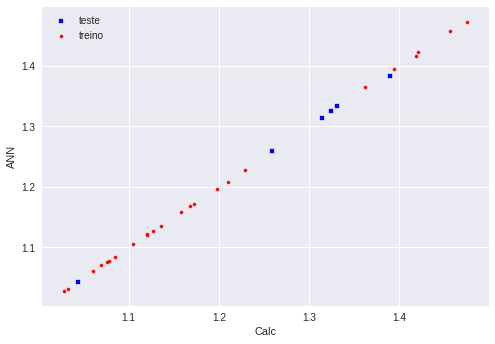

In [15]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test.values,y_calc_test.values, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train.values,y_calc_train.values, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('ANN')
plt.xlabel('Calc')
plt.show()